# Electric Vehicle Analysis(EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import bar_chart_race as bcr
from IPython.display import Image,display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

### Reading the Data Set

In [32]:
df = pd.read_csv(r"D:\Datasets\dataset.csv")
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602


In [33]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [34]:
df.columns = df.columns.str.replace(" ","_")

In [35]:
df.columns = df.columns.str.strip().str.lower()

In [37]:
df.head(3)

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602


In [38]:
df.shape
df.info()

(112634, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal_code                                        112634 non-null  int64  
 5   model_year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric_vehicle_type                              112634 non-null  object

#### checking for missing values

In [39]:
df.isnull().sum()

vin_(1-10)                                             0
county                                                 0
city                                                   0
state                                                  0
postal_code                                            0
model_year                                             0
make                                                   0
model                                                 20
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         0
base_msrp                                              0
legislative_district                                 286
dol_vehicle_id                                         0
vehicle_location                                      24
electric_utility                                     443
2020_census_tract                                      0
dtype: int64

In [40]:
df.model.value_counts().reset_index().head()

,model,count
0,MODEL 3,23135
1,MODEL Y,17142
2,LEAF,12880
3,MODEL S,7377
4,BOLT EV,4910


In [41]:
df.legislative_district.value_counts().reset_index().head()

,legislative_district,count
0,41,7605
1,45,7112
2,48,6462
3,36,5251
4,46,4723


In [42]:
df.vehicle_location.value_counts().reset_index().head()

,vehicle_location,count
0,POINT (-122.13158 47.67858),2916
1,POINT (-122.2066 47.67887),2059
2,POINT (-122.1872 47.61001),2001
3,POINT (-122.31765 47.70013),1880
4,POINT (-122.12096 47.55584),1852


In [43]:
df.electric_utility.value_counts().reset_index().head()

,electric_utility,count
0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),40247
1,PUGET SOUND ENERGY INC,22172
2,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),21447
3,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,6522
4,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5053


#### Handle missing values

In [44]:
df.model = df.model.fillna(df.model.mode()[0])
df.legislative_district = df.legislative_district .fillna(df.legislative_district .mean())
df.vehicle_location = df.vehicle_location.fillna(df.vehicle_location.mode()[0])
df.electric_utility = df.electric_utility.fillna(df.electric_utility.mode()[0])

In [45]:
df.isnull().sum()

vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64

In [46]:
pd.options.display.float_format = '{:.0f}'.format
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
postal_code,112634,98156,2649,1730,98052,98119,98370,99701
model_year,112634,2019,3,1997,2017,2020,2022,2023
electric_range,112634,88,102,0,0,32,208,337
base_msrp,112634,1793,10784,0,0,0,0,845000
legislative_district,112634,30,15,1,18,34,43,49
dol_vehicle_id,112634,199456680,93984270,4777,148414150,192389624,219189880,479254772
2020_census_tract,112634,52966495754,1699104500,1101001400,53033008500,53033029305,53053072506,56033000100


### Univariate Analysis

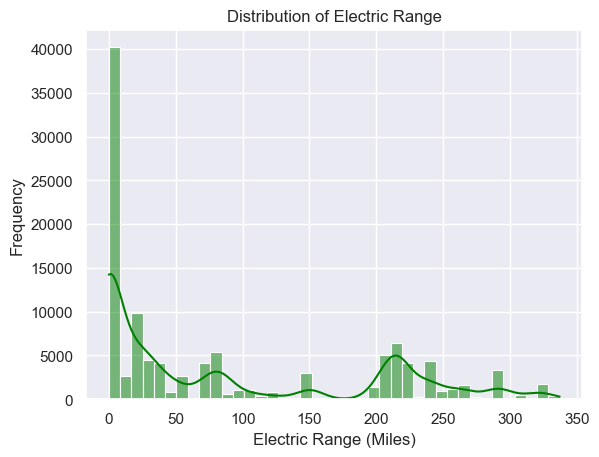

In [47]:
sns.histplot(x=df.electric_range,kde=True, color='green')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (Miles)")
plt.ylabel('Frequency')
plt.show();

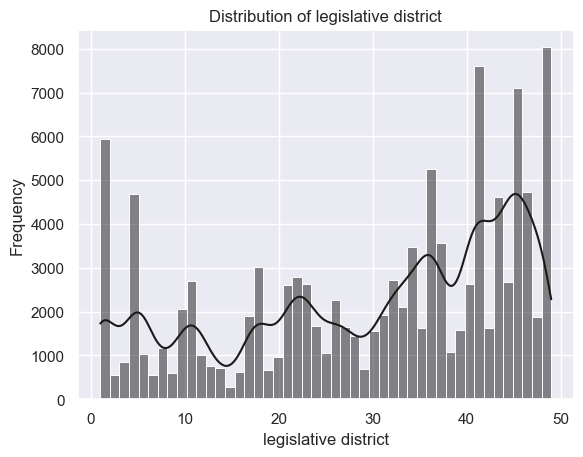

In [48]:
sns.histplot(x=df.legislative_district,kde=True,color = 'k')
plt.title("Distribution of legislative district")
plt.xlabel("legislative district")
plt.ylabel('Frequency')
plt.show();

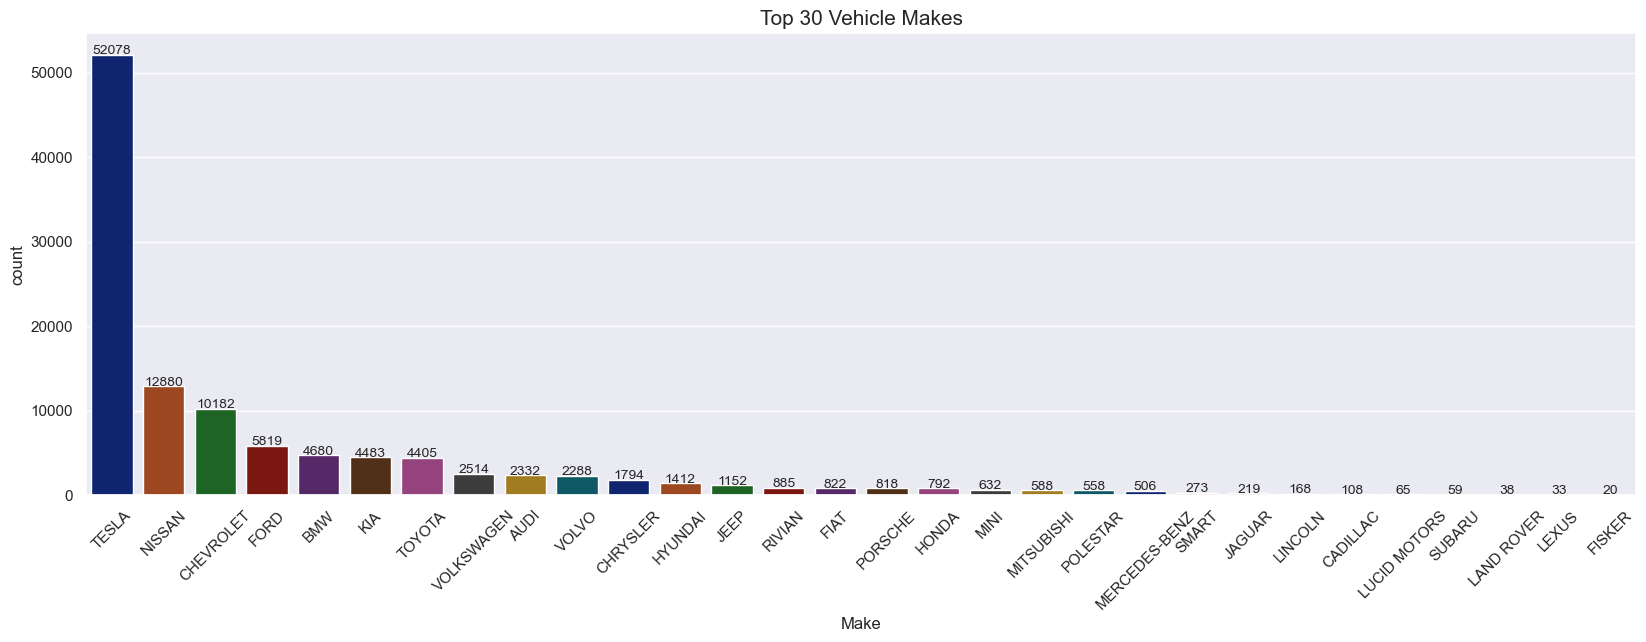

In [49]:
plt.figure(figsize=(20,6))
top_makes = df.make.value_counts().nlargest(30)
sns.barplot(x=top_makes.index,y = top_makes.values,palette ='dark')

for index,value in enumerate(top_makes.values):
    plt.text(index,value + 100,str(value),ha ='center',fontsize=10)

plt.title("Top 30 Vehicle Makes",fontsize=15)
plt.xlabel('Make',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.xticks(rotation = 45)
plt.show();

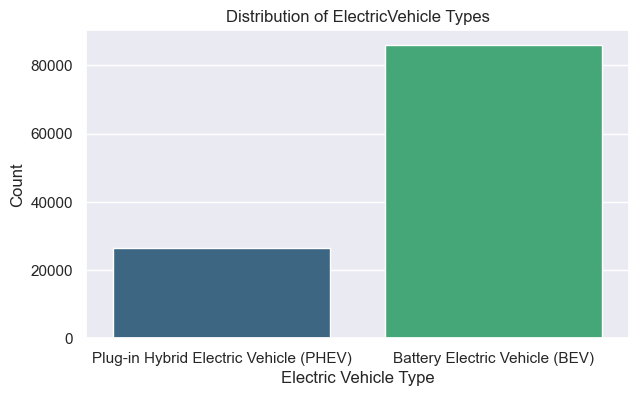

In [50]:
plt.figure(figsize=(7,4))
sns.countplot(x='electric_vehicle_type',data= df,palette='viridis')
plt.title("Distribution of ElectricVehicle Types")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.show();

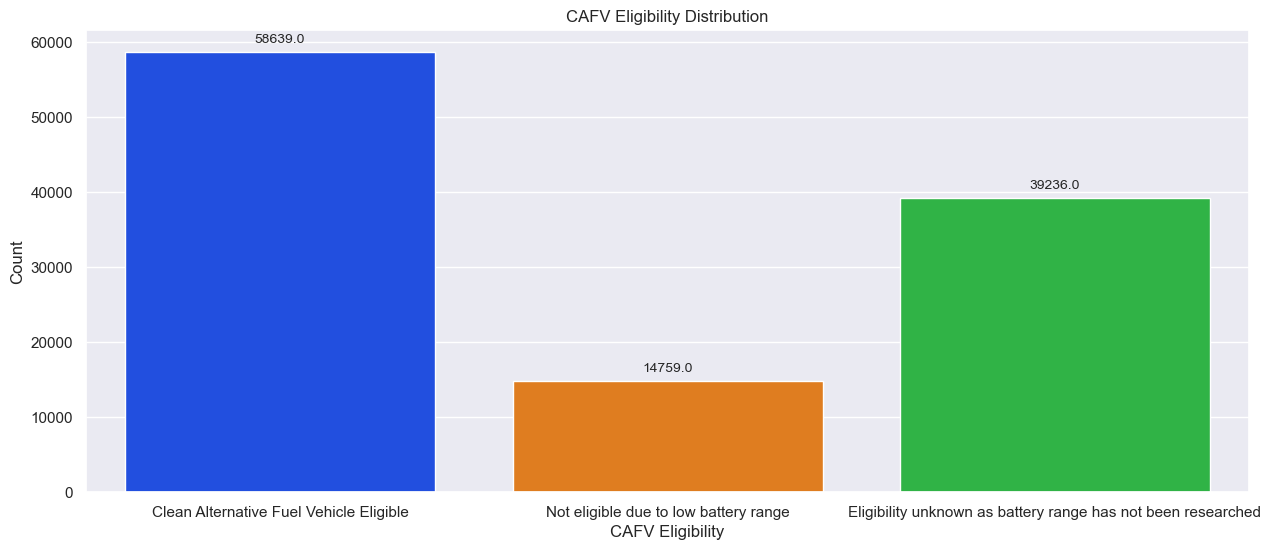

In [51]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='clean_alternative_fuel_vehicle_(cafv)_eligibility',data=df,palette="bright")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2.,p.get_height()),
                ha='center',va ='center',xytext=(0,9),textcoords ='offset points',fontsize=10)
plt.title('CAFV Eligibility Distribution',fontsize=12)
plt.xlabel('CAFV Eligibility',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show();

### Bivariate Analysis

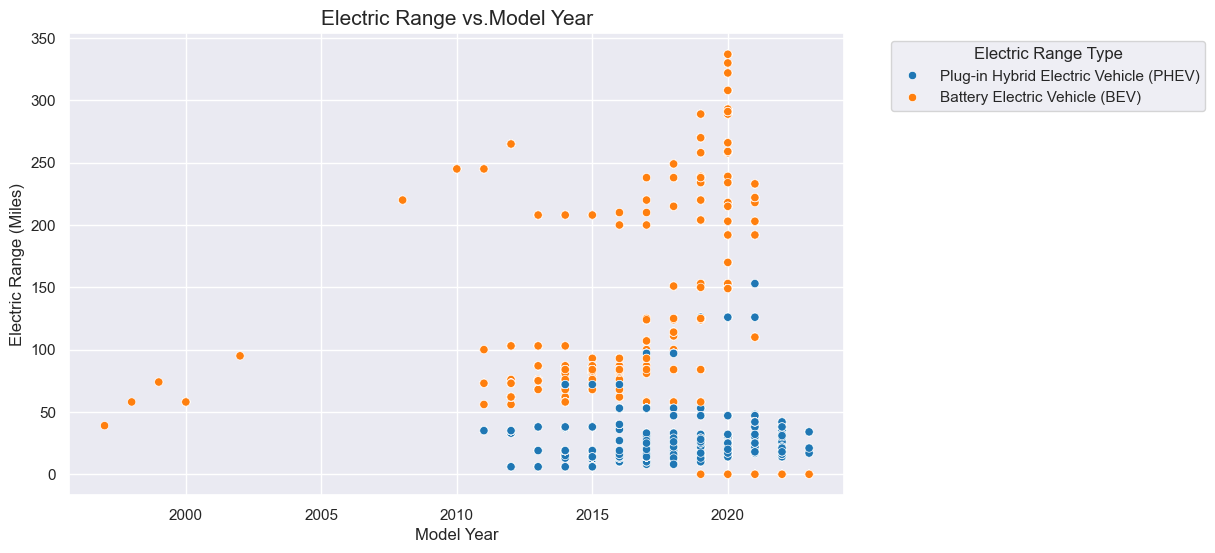

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='model_year',y='electric_range',data = df,hue ='electric_vehicle_type' ,palette='tab10')
plt.title("Electric Range vs.Model Year",fontsize=15)
plt.xlabel('Model Year',fontsize=12)
plt.ylabel("Electric Range (Miles)",fontsize=12)
plt.legend(title="Electric Range Type",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show();

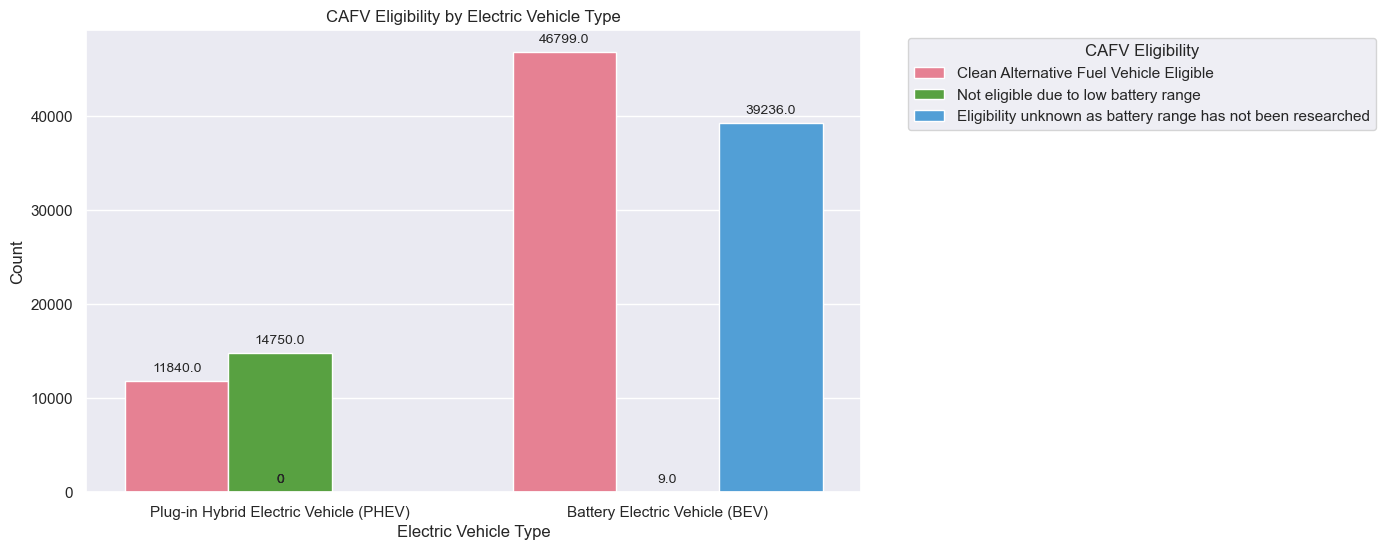

In [53]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='electric_vehicle_type',data = df,hue ='clean_alternative_fuel_vehicle_(cafv)_eligibility' ,palette='husl')

#Adding data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',(p.get_x() + p.get_width() / 2.,height),
                ha='center',va ='center',xytext=(0,9),textcoords ='offset points',fontsize=10)
plt.title('CAFV Eligibility by Electric Vehicle Type',fontsize=12)
plt.xlabel('Electric Vehicle Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(title="CAFV Eligibility",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show();

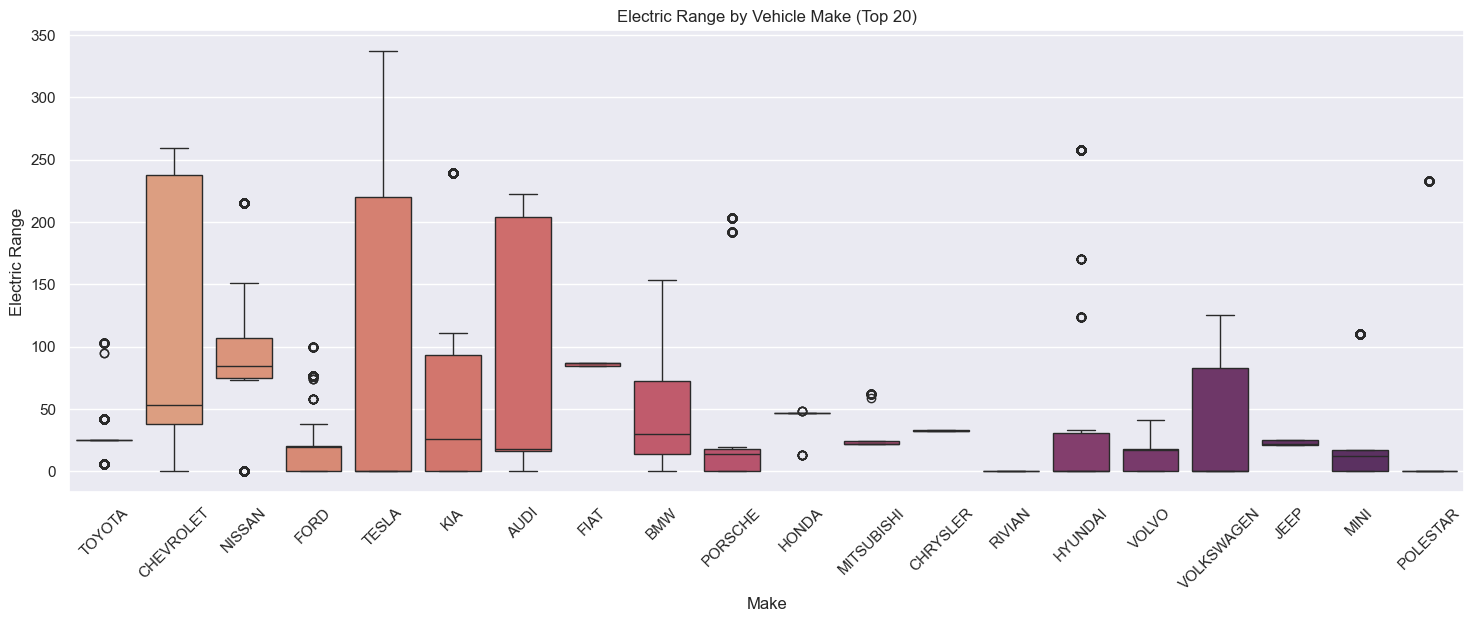

In [54]:
plt.figure(figsize=(18,6))
top_makes = df['make'].value_counts().nlargest(20).index
ax = sns.boxplot(x='make',y ='electric_range',data=df[df['make'].isin(top_makes)],palette='flare')

plt.title('Electric Range by Vehicle Make (Top 20)',fontsize=12)
plt.xlabel('Make',fontsize=12)
plt.ylabel('Electric Range',fontsize=12)
plt.xticks(rotation=45)

# Add median data labels on top of boxes
for i, box in enumerate(ax.artists):
    y = box.get_ydata()
    median = round(data[data['make'] == top_makes[i]]['electric_range'].median(), 2)
    plt.text(i, median + 10, f'{median}',ha='center',fontsize=10)
plt.show();

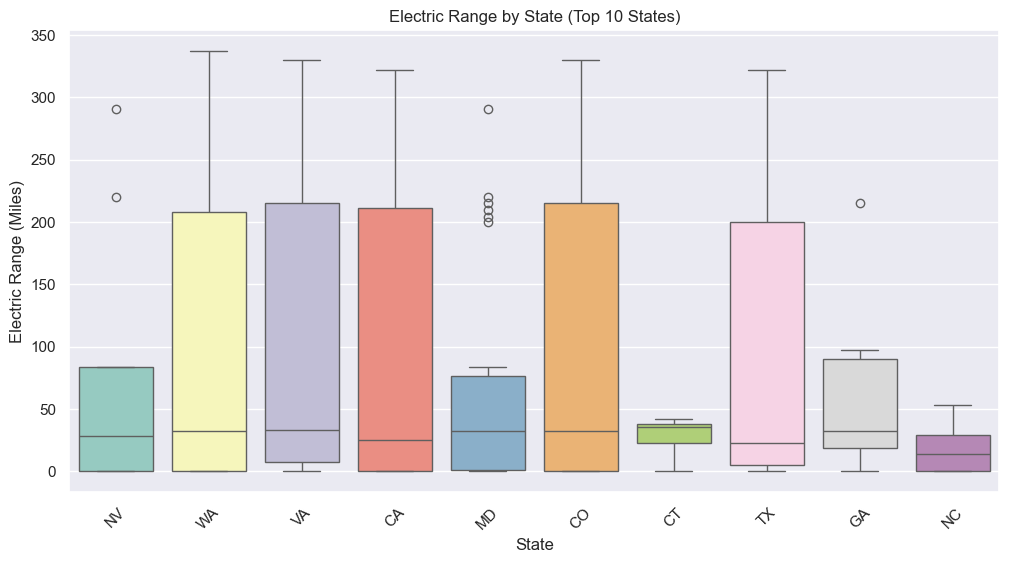

In [55]:
plt.figure(figsize=(12,6))
top_states = df['state'].value_counts().nlargest(10).index
ax = sns.boxplot(x='state',y ='electric_range',data = df[df['state'].isin(top_states)],palette='Set3')

plt.title('Electric Range by State (Top 10 States)',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel('Electric Range (Miles)',fontsize=12)
plt.xticks(rotation=45)

# Add median data labels on top of boxes
for i, box in enumerate(ax.artists):
    y = box.get_ydata()
    median = round(df[df['state'] == top_states[i]]['electric_range'].median(), 2)
    plt.text(i, median + 10, f'{median}',ha='center',fontsize=10)
plt.show();


### Task-2: To create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [ ]:
#Group data by 'state' and count the number of electric vehicles per state
ev_count_by_state = df.groupby('state').size().reset_index(name='ev_count')

# create the choropleth map
fig = px.choropleth(
    ev_count_by_state,
    locations='state',
    locationmode ='USA-states',
    color ='ev_count',
    color_continuous_scale = 'Blues',
    scope ='usa',
    labels={'ev_count':'Number of EVs'},
    title = 'Number of Electric Vehicles by State'
)

#update the layout for better visualization
fig.update_layout(
    geo = dict(bgcolor = 'rgba(0,0,0,0)'),
    title_x = 0.5
)
fig.show()

### Task-3: Create a Racing Barplot to display the animation of EV Make and its count each year

In [ ]:
df_counts = df.groupby(['model_year','make']).size().unstack(fill_value=0)

In [ ]:
bcr.bar_chart_race(
    df=df_counts,
    filename = 'ev_make_race.gif',
    title = 'Electric Vehicle Make Count Over Time',
    period_length=3000,
    sort='desc',
    n_bars=10,
    steps_per_period = 45,
    figsize=(10,6),
    title_size=10,
    bar_label_size=10
)

In [ ]:
from IPython.display import Image

Image("ev_make_race.gif")

## Conclusion

- **Electric Range Distribution**:The majority of electric vehicles have a typical range that falls within a common range bracket, suggesting a trend toward standardized battery capacities across the industry. However, a few outliers exist, with some vehicles offering significantly higher or lower ranges, possibly reflecting variations in technology or design choices across different manufacturers or models.
- **Legislative Districts**: The distribution of electric vehicles is uneven across different legislative districts. Some districts show higher concentrations of EVs, likely benefiting from more established infrastructure, while others have lower EV presence, indicating areas where infrastructure development (such as more charging stations) could be prioritized to support further adoption.
- **Geographic Distribution**:Certain regions, particularly specific cities or states, demonstrate a higher rate of electric vehicle adoption. This suggests that local factors such as government incentives, environmental policies, and the availability of charging infrastructure play a significant role in driving EV adoption in these areas. Regions with lower adoption rates may face challenges related to infrastructure or policy support.

## Overall Conclusion

- The analysis highlights key trends in the adoption of electric vehicles, focusing on geographical distribution and performance metrics such as electric range. The dynamic visualizations, especially the bar chart race, provide a compelling view of how manufacturers are competing and evolving over time, while histograms offer deeper insight into the distribution of ranges and adoption rates.

- This information serves as a crucial tool for both policymakers and manufacturers. Policymakers can use it to identify regions where infrastructure investments, like more charging stations, are needed. Manufacturers can leverage the insights to improve vehicle performance, such as increasing electric range to meet market demand or addressing gaps in underserved locations.

In [ ]:
# pip install ipynbcompress